#### **Next Word Predictor using LSTM-**

The goal is to build a model that predicts the next word in a Sentence based on the previous words. This is a type of Language Modelling.

Language Modelling - It's the task of predicting the next word in a sequence.

##### **Project Workflow-**

1) Step 1- Data Preparation: Convert Unsupervised Text to Supervised Format
2) Step 2- Model Building: Define the LSTM Architecture
3) Step 3- Training Loop: Train model using input-output pairs
4) Step 4- Prediction: Use the trained model to predict next words in real text.

In [8]:
import sys
!{sys.executable} -m pip install nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import Dataset , DataLoader
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

In [ ]:
document = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""

In [11]:
# Required files for Tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [24]:
# Tokenize
tokens = word_tokenize(document.lower())
print(tokens)

['about', 'the', 'program', 'what', 'is', 'the', 'course', 'fee', 'for', 'data', 'science', 'mentorship', 'program', '(', 'dsmp', '2023', ')', 'the', 'course', 'follows', 'a', 'monthly', 'subscription', 'model', 'where', 'you', 'have', 'to', 'make', 'monthly', 'payments', 'of', 'rs', '799/month', '.', 'what', 'is', 'the', 'total', 'duration', 'of', 'the', 'course', '?', 'the', 'total', 'duration', 'of', 'the', 'course', 'is', '7', 'months', '.', 'so', 'the', 'total', 'course', 'fee', 'becomes', '799', '*', '7', '=', 'rs', '5600', '(', 'approx', '.', ')', 'what', 'is', 'the', 'syllabus', 'of', 'the', 'mentorship', 'program', '?', 'we', 'will', 'be', 'covering', 'the', 'following', 'modules', ':', 'python', 'fundamentals', 'python', 'libraries', 'for', 'data', 'science', 'data', 'analysis', 'sql', 'for', 'data', 'science', 'maths', 'for', 'machine', 'learning', 'ml', 'algorithms', 'practical', 'ml', 'mlops', 'case', 'studies', 'you', 'can', 'check', 'the', 'detailed', 'syllabus', 'here',

In [17]:
# Build VOcab
vocab = {'<UNK>': 0}

for token in Counter(tokens).keys():
    if token not in vocab:
        vocab[token] = len(vocab)

vocab

{'<UNK>': 0,
 'about': 1,
 'the': 2,
 'program': 3,
 'what': 4,
 'is': 5,
 'course': 6,
 'fee': 7,
 'for': 8,
 'data': 9,
 'science': 10,
 'mentorship': 11,
 '(': 12,
 'dsmp': 13,
 '2023': 14,
 ')': 15,
 'follows': 16,
 'a': 17,
 'monthly': 18,
 'subscription': 19,
 'model': 20,
 'where': 21,
 'you': 22,
 'have': 23,
 'to': 24,
 'make': 25,
 'payments': 26,
 'of': 27,
 'rs': 28,
 '799/month': 29,
 '.': 30,
 'total': 31,
 'duration': 32,
 '?': 33,
 '7': 34,
 'months': 35,
 'so': 36,
 'becomes': 37,
 '799': 38,
 '*': 39,
 '=': 40,
 '5600': 41,
 'approx': 42,
 'syllabus': 43,
 'we': 44,
 'will': 45,
 'be': 46,
 'covering': 47,
 'following': 48,
 'modules': 49,
 ':': 50,
 'python': 51,
 'fundamentals': 52,
 'libraries': 53,
 'analysis': 54,
 'sql': 55,
 'maths': 56,
 'machine': 57,
 'learning': 58,
 'ml': 59,
 'algorithms': 60,
 'practical': 61,
 'mlops': 62,
 'case': 63,
 'studies': 64,
 'can': 65,
 'check': 66,
 'detailed': 67,
 'here': 68,
 '-': 69,
 'https': 70,
 '//learnwith.campusx.i

In [20]:
input_sentences = document.split('\n')  # Document already in a list format

In [21]:
# Converting Text in Sentences to Indexes by replacing the word with vocab index

def text_to_indices(sentence, vocab):

    numerical_sentence = []

    for token in sentence:
        if token in vocab:
            numerical_sentence.append(vocab[token])
        else:
            numerical_sentence.append(vocab['<UNK>'])

    return numerical_sentence

In [22]:
input_numerical_sentences = []

for sentence in input_sentences:
    input_numerical_sentences.append(text_to_indices(word_tokenize(sentence.lower()), vocab))

In [23]:
input_numerical_sentences

[[1, 2, 3],
 [4, 5, 2, 6, 7, 8, 9, 10, 11, 3, 12, 13, 14, 15],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 18, 26, 27, 28, 29, 30],
 [4, 5, 2, 31, 32, 27, 2, 6, 33],
 [2,
  31,
  32,
  27,
  2,
  6,
  5,
  34,
  35,
  30,
  36,
  2,
  31,
  6,
  7,
  37,
  38,
  39,
  34,
  40,
  28,
  41,
  12,
  42,
  30,
  15],
 [4, 5, 2, 43, 27, 2, 11, 3, 33],
 [44, 45, 46, 47, 2, 48, 49, 50],
 [51, 52],
 [51, 53, 8, 9, 10],
 [9, 54],
 [55, 8, 9, 10],
 [56, 8, 57, 58],
 [59, 60],
 [61, 59],
 [62],
 [63, 64],
 [22, 65, 66, 2, 67, 43, 68, 69, 70, 50, 71],
 [45, 72, 58, 73, 74, 46, 17, 75, 27, 76, 3, 33],
 [77, 78, 74, 73, 72, 58, 79, 80, 81, 17, 75, 27, 76, 3, 82, 83, 84, 30],
 [4, 85, 86, 87, 17, 88, 89, 33, 45, 86, 90, 17, 91, 27, 2, 89, 33],
 [92,
  93,
  94,
  95,
  80,
  96,
  78,
  36,
  97,
  85,
  22,
  87,
  17,
  89,
  22,
  65,
  98,
  99,
  73,
  100,
  2,
  91,
  30],
 [21, 65, 86, 101, 2, 102, 103, 33],
 [104,
  76,
  105,
  106,
  24,
  107,
  108,
  109,
  108,
  110,
  111,
  27,

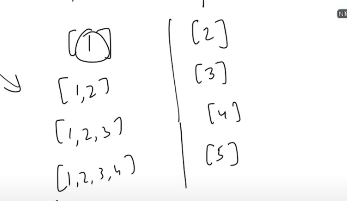

In [29]:
training_sequence = []  # Stores the Order of the sentences

for sentence in input_numerical_sentences:
    
    for i in range(1, len(sentence)):
        training_sequence.append(sentence[:i+1])

In [32]:
len(training_sequence)  # This is the dataset that the LSTM Will be trained on

training_sequence[:5]

[[1, 2], [1, 2, 3], [4, 5], [4, 5, 2], [4, 5, 2, 6]]

Now, Each Sentence has a different no. of Words with will lead to different no. of sequence size which LSTM will not be able to process as we will be sending in Batches (ignore if sending 1 sentence to LSTM). So, we have to do Padding in order to ensure that the training sequence sizes are constant

In [34]:
len_list = []  # This will store the length of each sequence and then we will find the max length

for sequence in training_sequence:
    len_list.append(len(sequence))

max(len_list)

62

In [ ]:
padded_training_sequence = []  # Stores the training sequence with same size for each sequence

for sequence in training_sequence:
    padded_training_sequence.append([0]*(max(len_list) - len(sequence)) + sequence)  # Printing 0 in front of the main data

len(padded_training_sequence[10])

62

In [39]:
padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [40]:
X = padded_training_sequence[:, :-1]  # breaking the data in i/p and target variable as shown in the image above
y = padded_training_sequence[:, -1]

In [41]:
X

tensor([[  0,   0,   0,  ...,   0,   0,   1],
        [  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   0,   0,   4],
        ...,
        [  0,   0,   0,  ...,   0, 285, 176],
        [  0,   0,   0,  ..., 285, 176, 286],
        [  0,   0,   0,  ..., 176, 286, 287]])

In [42]:
y

tensor([  2,   3,   5,   2,   6,   7,   8,   9,  10,  11,   3,  12,  13,  14,
         15,   6,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  18,  26,
         27,  28,  29,  30,   5,   2,  31,  32,  27,   2,   6,  33,  31,  32,
         27,   2,   6,   5,  34,  35,  30,  36,   2,  31,   6,   7,  37,  38,
         39,  34,  40,  28,  41,  12,  42,  30,  15,   5,   2,  43,  27,   2,
         11,   3,  33,  45,  46,  47,   2,  48,  49,  50,  52,  53,   8,   9,
         10,  54,   8,   9,  10,   8,  57,  58,  60,  59,  64,  65,  66,   2,
         67,  43,  68,  69,  70,  50,  71,  72,  58,  73,  74,  46,  17,  75,
         27,  76,   3,  33,  78,  74,  73,  72,  58,  79,  80,  81,  17,  75,
         27,  76,   3,  82,  83,  84,  30,  85,  86,  87,  17,  88,  89,  33,
         45,  86,  90,  17,  91,  27,   2,  89,  33,  93,  94,  95,  80,  96,
         78,  36,  97,  85,  22,  87,  17,  89,  22,  65,  98,  99,  73, 100,
          2,  91,  30,  65,  86, 101,   2, 102, 103,  33,  76, 1

In [43]:
class CustomDataset(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [45]:
dataset = CustomDataset(X,y)
len(dataset)

942

In [46]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

##### **LSTM Architecture**
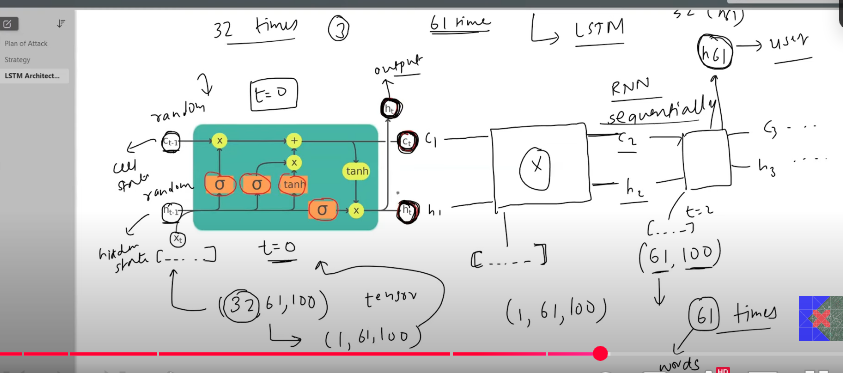

In [49]:
class LSTM(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 100)
        self.lstm = nn.LSTM(100, 150, batch_first=True)  # Gives 3 Outputs
        self.fc = nn.Linear(150, vocab_size)
    
    def forward(self, X):
        embedded = self.embedding(X)
        intermediate_hidden_states, (final_hidden_state , final_cell_state) = self.lstm(embedded)
        output = self.fc(final_hidden_state.squeeze(0))
        return output

In [50]:
model = LSTM(len(vocab))

In [51]:
device = torch.device('cuda' if torch.cuda.is_available else "cpu")
print("Using Device:", device)

Using Device: cuda


In [52]:
model.to(device)

LSTM(
  (embedding): Embedding(289, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=289, bias=True)
)

In [55]:
epochs = 100
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [56]:
# Training Loop 

for epoch in range(epochs):
    total_loss = 0

    for batch_x, batch_y in dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss/len(dataloader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}") 


Epoch: 1, Loss: 0.1786
Epoch: 2, Loss: 0.1495
Epoch: 3, Loss: 0.1364
Epoch: 4, Loss: 0.1351
Epoch: 5, Loss: 0.1332
Epoch: 6, Loss: 0.1258
Epoch: 7, Loss: 0.1190
Epoch: 8, Loss: 0.1181
Epoch: 9, Loss: 0.1165
Epoch: 10, Loss: 0.1152
Epoch: 11, Loss: 0.1130
Epoch: 12, Loss: 0.1189
Epoch: 13, Loss: 0.1144
Epoch: 14, Loss: 0.1097
Epoch: 15, Loss: 0.1102
Epoch: 16, Loss: 0.1103
Epoch: 17, Loss: 0.1083
Epoch: 18, Loss: 0.1061
Epoch: 19, Loss: 0.1112
Epoch: 20, Loss: 0.1162
Epoch: 21, Loss: 0.1048
Epoch: 22, Loss: 0.1128
Epoch: 23, Loss: 0.1052
Epoch: 24, Loss: 0.1095
Epoch: 25, Loss: 0.1078
Epoch: 26, Loss: 0.1011
Epoch: 27, Loss: 0.1011
Epoch: 28, Loss: 0.1055
Epoch: 29, Loss: 0.1067
Epoch: 30, Loss: 0.1043
Epoch: 31, Loss: 0.1064
Epoch: 32, Loss: 0.1009
Epoch: 33, Loss: 0.1036
Epoch: 34, Loss: 0.1019
Epoch: 35, Loss: 0.1014
Epoch: 36, Loss: 0.1079
Epoch: 37, Loss: 0.1017
Epoch: 38, Loss: 0.0996
Epoch: 39, Loss: 0.1019
Epoch: 40, Loss: 0.1023
Epoch: 41, Loss: 0.0997
Epoch: 42, Loss: 0.0999
E

In [65]:
# Prediction

def prediction(model, vocab, text):

    # Tokenize
    tokenized_text = word_tokenize(text.lower())

    # Text to indices
    numerical_text = text_to_indices(tokenized_text, vocab)

    # Padding
    padded_text = torch.tensor([0] * (max(len_list) - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0).to(device)

    # Send to Model
    output = model(padded_text)

    # Predicted Index, value in the form of logits
    value, index = torch.max(output, dim=1)

    # Merge with Text
    return text + " " + list(vocab.keys())[index]

In [66]:
prediction(model, vocab, "The course follows a monthly")

'The course follows a monthly subscription'

In [ ]:
# Auto-Complete type Scenario
import time 

num_tokens = 10  # Print the next 10 predictions
input_text =  "The course follows a monthly"

for i in range(num_tokens):
    output_text = prediction(model, vocab, input_text)
    print(output_text)
    input_text = output_text
    time.sleep(0.5)

The course follows a monthly subscription
The course follows a monthly subscription model
The course follows a monthly subscription model where
The course follows a monthly subscription model where you
The course follows a monthly subscription model where you have
The course follows a monthly subscription model where you have to
The course follows a monthly subscription model where you have to make
The course follows a monthly subscription model where you have to make monthly
The course follows a monthly subscription model where you have to make monthly payments
The course follows a monthly subscription model where you have to make monthly payments of


In [69]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [71]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader1, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 95.65%
